In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import properscoring as ps
import matplotlib.pyplot as plt
import datetime

In [3]:
import importlib

In [4]:
import seaborn as sns

cpal = sns.color_palette()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

%matplotlib inline

In [5]:
import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.tmh_plot as tmt_plot
import letkf_forecasting.analyse_results as analyse_results
import letkf_forecasting.prepare_sat_data as prepare_sat_data

In [6]:
import numba

In [7]:
import sklearn.calibration as calibration

In [8]:
%matplotlib inline

In [17]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15']
this = analyse_results.prob_analysis_runs(
    month_day, runs, [15, 30, 45, 60])

[4, 9]
owp_opt
ow_15
[4, 15]
owp_opt
ow_15
[4, 18]
owp_opt
ow_15
[5, 6]
owp_opt
ow_15
[5, 9]
owp_opt
ow_15
[5, 29]
owp_opt
ow_15
[6, 11]
owp_opt
ow_15
[6, 12]
owp_opt
ow_15
[4, 2]
owp_opt
ow_15
[4, 5]
owp_opt
ow_15
[4, 19]
owp_opt
ow_15
[5, 7]
owp_opt
ow_15
[5, 8]
owp_opt
ow_15
[5, 19]
owp_opt
ow_15
[6, 3]
owp_opt
ow_15
[6, 10]
owp_opt
ow_15
[6, 14]
owp_opt
ow_15
[6, 15]
owp_opt
ow_15
[4, 10]
owp_opt
ow_15
[4, 11]
owp_opt
ow_15
[4, 12]
owp_opt
ow_15
[4, 20]
owp_opt
ow_15
[4, 21]
owp_opt
ow_15
[4, 22]
owp_opt
ow_15
[4, 25]
owp_opt
ow_15
[4, 26]
owp_opt
ow_15
[5, 5]
owp_opt
ow_15
[5, 20]
owp_opt
ow_15
[5, 21]
owp_opt
ow_15
[5, 22]
owp_opt
ow_15
[5, 23]
owp_opt
ow_15
[5, 24]
owp_opt
ow_15
[5, 25]
owp_opt
ow_15
[5, 30]
owp_opt
ow_15
[6, 16]
owp_opt
ow_15
[6, 17]
owp_opt
ow_15
[6, 18]
owp_opt
ow_15
[6, 19]
owp_opt
ow_15
[6, 22]
owp_opt
ow_15


In [222]:
importlib.reload(analyse_results)
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
runs = ['owp_opt', 'ow_15']
bounds_dict = {'clear': [0, 0.1],
               'thin': [0.1, 0.4],
               'thick': [0.4, 1]}
N_bins = 10
this = analyse_results.fraction_of_positives_runs(
    month_day, runs, [15, 30, 45, 60], bounds_dict, N_bins)

[4, 9]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[4, 15]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[4, 18]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 6]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 9]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 29]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 11]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 12]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[4, 2]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[4, 5]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[4, 19]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 7]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 8]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[5, 19]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 3]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 10]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 14]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick
[6, 15]
owp_opt
clear
thin
thick
ow_15
clear
thin
thick


In [203]:
this_fop, this_mpp = calibration.calibration_curve(
    this[0].ravel(), this[1].ravel(), n_bins=N_bins)

In [206]:
this_mpp

array([ 0.2       ,  0.28826562,  0.3727636 ,  0.48795823,  0.56262036,
        0.65026795])

In [ ]:
this[1]

In [210]:
this[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [217]:
this_fop, this_mpp = calibration.calibration_curve(
    this[0].ravel(), this[1].ravel() - 1e-8, n_bins=N_bins)

In [219]:
this_mpp

array([ 0.19999999,  0.28826561,  0.37276359,  0.48795822,  0.56262035,
        0.65026794])

In [205]:
this[2]

array([ 0.        ,  0.        ,  0.2       ,  0.28826562,  0.3727636 ,
        0.48795823,  0.56262036,  0.        ,  0.        ,  0.        ,
        0.65026795])

In [204]:
np.floor(this_mpp*10).astype('int')

array([2, 2, 3, 4, 5, 6])

In [200]:
this_mpp

array([ 0.2       ,  0.34433905,  0.5395445 ,  0.65026795])

In [201]:
this_fop

array([ 0.        ,  0.13055896,  0.0635663 ,  0.        ])

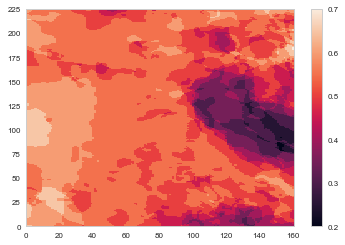

In [196]:
plt.figure()
im = plt.pcolormesh(this[1], )
plt.colorbar(im)

In [188]:
this[0][this[0]==.2]

array([], dtype=float64)

In [174]:
str(5.0).replace('.', 'p')

'5p0'

In [167]:
this[3][45].loc['2014-04-09 17:15:00']

bin
0    0.000000
1    0.000000
2    1.000000
3    0.968051
4    0.938274
5    0.840128
6    0.874423
7    0.906024
8    0.000000
9    0.000000
Name: 2014-04-09 17:15:00, dtype: float64

In [170]:
np.floor(np.array(
    this[4][45].loc['2014-04-09 17:15:00']*10))

array([ 0.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  0.,  0.])

In [168]:
present = np.floor(np.array(
    this[4][45].loc['2014-04-09 17:15:00']*10)).astype('int')[:-4]

In [169]:
present

array([0, 0, 2, 3, 4, 5])

In [163]:
np.setdiff1d(np.arange(10), present)

array([0, 1, 8, 9])

In [148]:
this[2][45].loc['2014-04-09 17:15:00']

bin
0        0.0
1        0.0
2       83.0
3     1417.0
4    21031.0
5    10245.0
6     3034.0
7      387.0
8       28.0
9        0.0
Name: 2014-04-09 17:15:00, dtype: float64

In [147]:
for his in [15, 30, 45, 60]:
    print((this[2][his] == 0).sum(axis=1))

time
2014-04-09 16:30:00    0
2014-04-09 16:45:00    1
2014-04-09 17:00:00    0
2014-04-09 17:15:00    0
2014-04-09 17:30:00    0
2014-04-09 17:45:00    0
2014-04-09 18:00:00    0
2014-04-09 18:30:00    0
2014-04-09 18:45:00    0
2014-04-09 19:00:00    0
2014-04-09 19:15:00    0
2014-04-09 19:30:00    0
2014-04-09 19:45:00    0
2014-04-09 20:00:00    0
2014-04-09 20:15:00    0
2014-04-09 20:30:00    0
2014-04-09 21:00:00    0
2014-04-09 21:30:00    0
2014-04-09 21:45:00    0
2014-04-09 22:00:00    0
2014-04-09 22:15:00    0
2014-04-09 22:30:00    0
dtype: int64
time
2014-04-09 16:30:00    0
2014-04-09 16:45:00    0
2014-04-09 17:00:00    1
2014-04-09 17:15:00    0
2014-04-09 17:30:00    0
2014-04-09 17:45:00    0
2014-04-09 18:00:00    0
2014-04-09 18:30:00    0
2014-04-09 18:45:00    0
2014-04-09 19:00:00    0
2014-04-09 19:15:00    0
2014-04-09 19:30:00    0
2014-04-09 19:45:00    0
2014-04-09 20:00:00    0
2014-04-09 20:15:00    0
2014-04-09 20:30:00    0
2014-04-09 21:00:00    0
20

In [141]:
this[2][15] == 0

bin,0,1,2,3,4,5,6,7,8,9
time,,,,,,,,,,
2014-04-09 16:30:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 16:45:00,False,False,False,False,False,False,False,False,False,True
2014-04-09 17:00:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 17:15:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 17:30:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 17:45:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 18:00:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 18:30:00,False,False,False,False,False,False,False,False,False,False
2014-04-09 18:45:00,False,False,False,False,False,False,False,False,False,False


In [129]:
this = np.arange(10)
print(np.insert(this, 10, 100))
print(this.size)

[  0   1   2   3   4   5   6   7   8   9 100]
10


In [90]:
hist = np.array(this[2][15].iloc[1])

In [115]:
indexes

array([0, 5, 8])

In [120]:
np.insert(np.arange(10), [0, 10], 100)

array([100,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 100])

In [123]:
this = np.arange(10)
this[9] = 0
this[4] = 0
this[8] = 0
print(this)
that = this[this!=0]
print(that)
indexes = np.argwhere(this==0).ravel()
indexes -= np.arange(indexes.size)
values = 100
np.insert(that, indexes, values)

[0 1 2 3 0 5 6 7 0 0]
[1 2 3 5 6 7]


array([100,   1,   2,   3, 100,   5,   6,   7, 100, 100])

In [104]:
this

array([ 0,  1,  2,  3,  4,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [103]:
indexes = np.argwhere(hist == 0).ravel()
values = np.zeros(indexes.size)
np.insert(fop, indexes, values)

array([ 0.04722222,  0.1783484 ,  0.27761905,  0.37684523,  0.46259106,
        0.57045407,  0.66717137,  0.76055944,  0.85      ,  0.        ])

In [92]:
fop = np.array(this[4][15].iloc[1])[:-1]

In [96]:
hist

array([   328.,    649.,   6255.,   4599.,  12727.,   7246.,   2906.,
         1128.,    387.,      0.])

In [94]:
fop

array([ 0.04722222,  0.1783484 ,  0.27761905,  0.37684523,  0.46259106,
        0.57045407,  0.66717137,  0.76055944,  0.85      ])

In [89]:
np.ceil(this[4][15].iloc[1]*10)

bin
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9    NaN
Name: 2014-04-09 16:45:00, dtype: float64

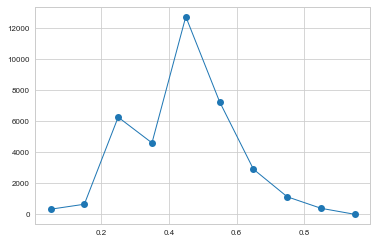

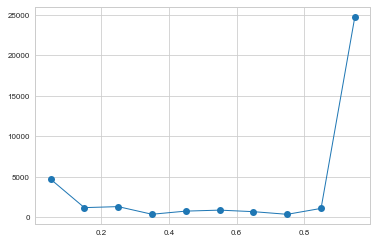

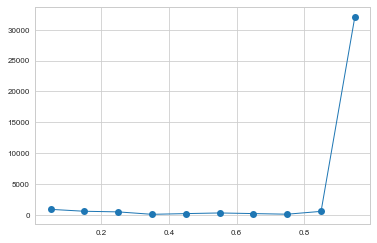

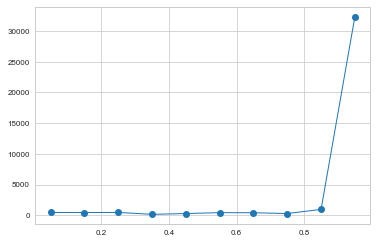

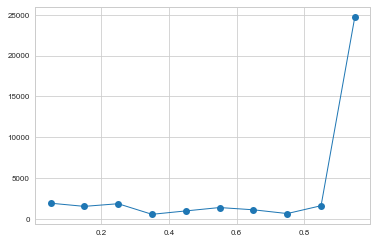

In [71]:
for ii in range(5):
    plt.figure()
    plt.plot(np.linspace(.05, .95, 10), this[ii], marker='o')

In [49]:
this[0][0]

array([ 0.09555556,  0.0566968 ,  0.21078167,  0.57859229,  0.83508701,
        0.89993694,  0.91259463,  0.96293706,  1.        ])

In [52]:
this[0][0]

array([ 0.09555556,  0.0566968 ,  0.21078167,  0.57859229,  0.83508701,
        0.89993694,  0.91259463,  0.96293706,  1.        ])

In [59]:
np.linspace(0, .9, 10) + 0.05

array([ 0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,  0.85,  0.95])

In [53]:
this[0][1]

array([ 0.04722222,  0.1783484 ,  0.27761905,  0.37684523,  0.46259106,
        0.57045407,  0.66717137,  0.76055944,  0.85      ])

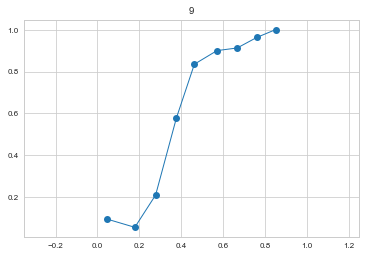

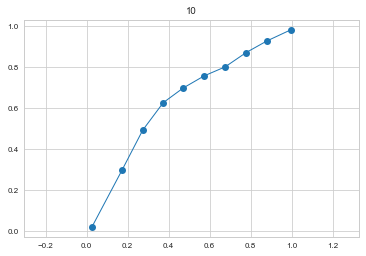

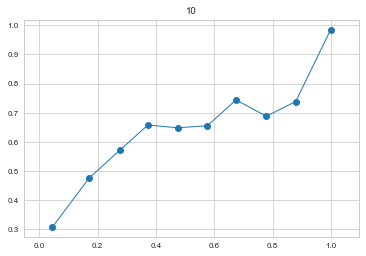

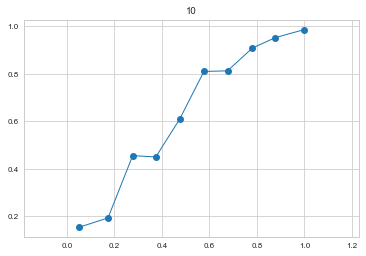

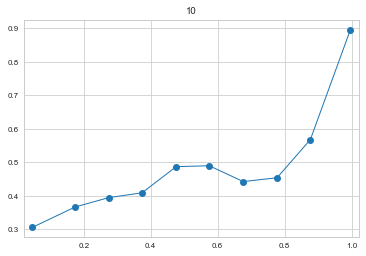

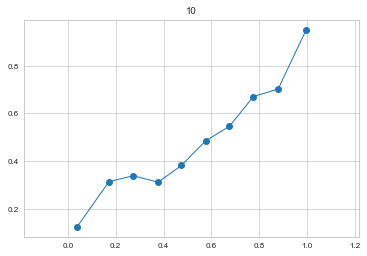

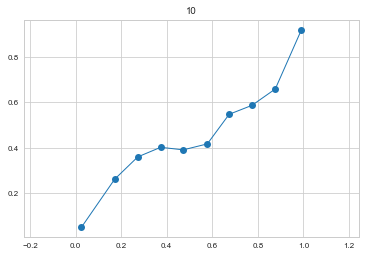

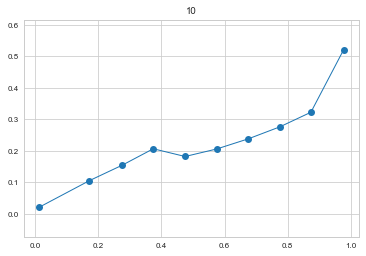

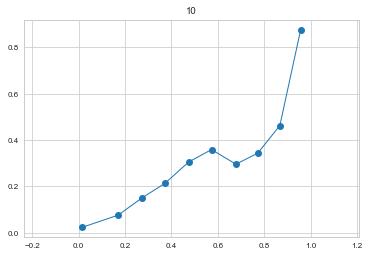

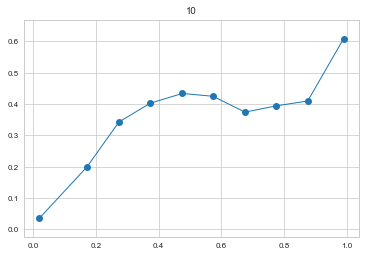

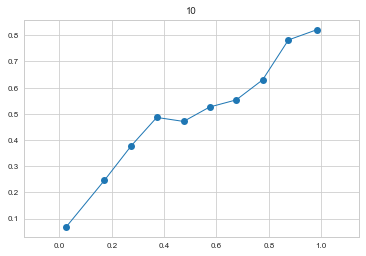

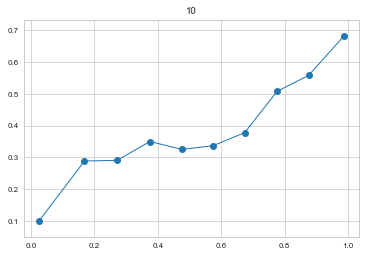

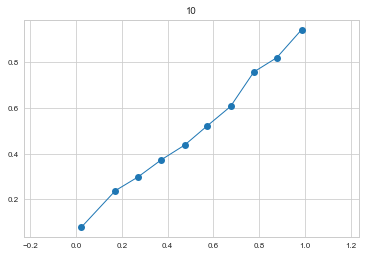

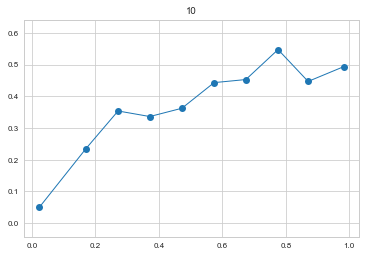

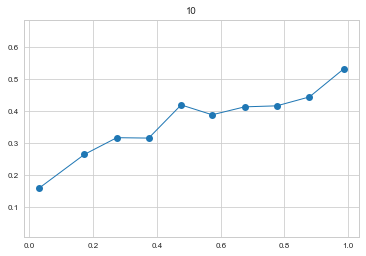

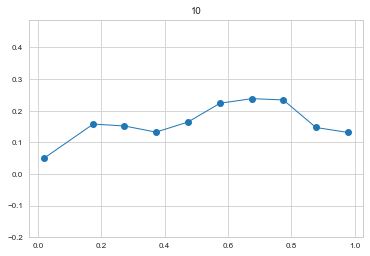

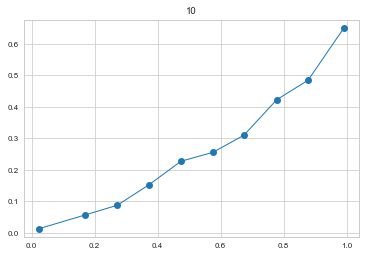

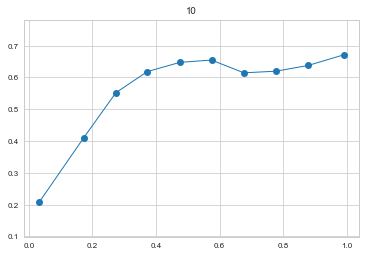

In [55]:
for ii in range(len(this)):
    plt.figure()
    plt.plot(this[ii][1], this[ii][0], marker='o')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.axis('equal')
    plt.title(this[ii][0].size)

In [ ]:
this[0]

In [ ]:
this[1]

In [ ]:
this[2]

In [ ]:
# importlib.reload(analyse_results)
# # month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
# # month_day = [[4, 9],  [4, 15], [4, 18],
# #              [5, 6],  [5, 9],  [5, 29],
# #              [6, 11], [6, 12],
# #              [4, 2],  [4, 5],  [4, 19],
# #              [5, 7],  [5, 8],  [5, 19],
# #              [6, 3],  [6, 10], [6, 14],
# #              [6, 15]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15],
#              [4, 10], [4, 11], [4, 12],
#              [4, 20], [4, 21], [4, 22],
#              [4, 25], [4, 26], [5, 5],
#              [5, 20], [5, 21], [5, 22],
#              [5, 23], [5, 24], [5, 25],
#              [5, 30], [6, 16], [6, 17],
#              [6, 18], [6, 19], [6, 22]]
# this = analyse_results.prob_analysis_baselines(
#     month_day, [15, 30, 45, 60],
#     '/a2/uaren/travis/data/satellite_data/cloudiness_index.h5')

In [ ]:
directory_name = 'third_set'
stat_type = 'crps'
for key in returned_dict:
    save_directory = ('/a2/uaren/travis/'
        + f'results/multi_day_error/probabilistic/{directory_name}/{stat_type}')
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
#     for error_stat in error_stats:
#         if error_stat == 'name':
#             continue
    this_dir = os.path.join(
        save_directory,
        key + '.h5')
    returned_dict[key].to_hdf(this_dir, key)
    error_stats[error_stat].to_hdf(this_dir, error_stat)

In [ ]:
sensor_loc = pd.read_hdf('/home/travis/python_code/letkf_forecasting_other_things/data/sensor_loc.h5')

In [ ]:
climatology = pd.read_hdf('/a2/uaren/travis/data/satellite_data/cloudiness_index.h5')
climatology = climatology.values.ravel()
climatology = climatology[~np.isnan(climatology)]
climatology = climatology.clip(min=0, max=1)

# For error domain many dates

In [ ]:
# month_day = [[4, 9], [4, 15], [4, 18], [5, 6], [5, 9], [5, 29], [6, 11], [6, 12]]
month_day = [[4, 9], [4, 15], [4, 18]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15]]
# month_day = [[4, 9],  [4, 15], [4, 18],
#              [5, 6],  [5, 9],  [5, 29],
#              [6, 11], [6, 12],
#              [4, 2],  [4, 5],  [4, 19],
#              [5, 7],  [5, 8],  [5, 19],
#              [6, 3],  [6, 10], [6, 14],
#              [6, 15],
#              [4, 10], [4, 11], [4, 12],
#              [4, 20], [4, 21], [4, 22],
#              [4, 25], [4, 26], [5, 5],
#              [5, 20], [5, 21], [5, 22],
#              [5, 23], [5, 24], [5, 25],
#              [5, 30], [6, 16], [6, 17],
#              [6, 18], [6, 19], [6, 22]]
dates = []
for ii in range(len(month_day)):
    dates.append(datetime.date(2014, month_day[ii][0], month_day[ii][1]))
base_folder = '/a2/uaren/travis'

In [ ]:
dates_truth = letkf_io.return_many_truths(dates, base_folder)
dates_truth = dates_truth['ci']
dates_truth = letkf_io.add_crop_attributes(dates_truth)
dates_truth = analyse_results.return_error_domain(dates_truth)

In [ ]:
persistence = dates_truth.copy()
persistence['time'] = persistence.time + pd.Timedelta('30min')

In [ ]:
dates_15 = letkf_io.return_many_days(dates, 'ow_15', base_folder)
dates_15 = dates_15['ci']
dates_15 = letkf_io.add_crop_attributes(dates_15)
dates_15 = analyse_results.return_error_domain(dates_15)
dates_15 = analyse_results.return_horizon(dates_15, 30)

In [ ]:
dates_wp = letkf_io.return_many_days(dates, 'owp_opt', base_folder)
dates_wp = dates_wp['ci']
dates_wp = letkf_io.add_crop_attributes(dates_wp)
dates_wp = analyse_results.return_error_domain(dates_wp)
dates_wp = analyse_results.return_horizon(dates_wp, 30)

In [ ]:
dates_error_times = np.intersect1d(dates_truth.time.to_pandas(), 
                                   dates_15.time.to_pandas())

In [ ]:
dates_error_times2 = np.intersect1d(dates_truth.time.to_pandas(), 
                                   persistence.time.to_pandas())

In [ ]:
dates_truth = dates_truth.sel(time=dates_error_times).load()
dates_15 = dates_15.sel(time=dates_error_times).load()
dates_wp = dates_wp.sel(time=dates_error_times).load()

In [ ]:
persistence = persistence.sel(time=dates_error_times).load()

In [ ]:
climatology_dates = dates_truth.values.ravel()
climatology_dates = climatology_dates[~np.isnan(climatology_dates)]
climatology_dates = climatology_dates.clip(min=0, max=1)

In [ ]:
crps_15_30 = ps.crps_ensemble(dates_truth.values,
                              dates_15.values.transpose([0, 2, 3, 1]))

In [ ]:
print('Average crps ow_15: ', crps_15_30.mean())

In [ ]:
crps_wp_30 = ps.crps_ensemble(dates_truth.values,
                              dates_wp.values.transpose([0, 2, 3, 1]))

In [ ]:
print('Average crps ow_15_wp: ', crps_wp_30.mean())

In [ ]:
crps_persistence = ps.crps_ensemble(
    dates_truth.values,
    persistence.values)

In [ ]:
print('Average crps persistence: ', crps_persistence.mean())

In [ ]:
persis_array = persistence.values
persis_shape = persis_array.shape
persis_array = persis_array.reshape([persis_shape[0], persis_shape[1]*persis_shape[2]])

In [ ]:
ens_members = 100
persis_weights = np.ones([dates_error_times.size, ens_members])
for ii in range(dates_error_times.size):#range(persis_ens.shape[0]):
    persis_weights[ii], bin_edges = np.histogram(persis_array[ii], bins=ens_members, range=(0, 1), normed=True)
persis_ens = (bin_edges[:-1] + bin_edges[1:])/2
persis_ens = np.repeat(persis_ens[None, :], persis_shape[2], axis=0)
persis_ens = np.repeat(persis_ens[None, :], persis_shape[1], axis=0)
persis_ens = np.repeat(persis_ens[None, :], persis_shape[0], axis=0)

In [ ]:
persis_weights = np.repeat(persis_weights[:, None, :], persis_shape[2], axis=1)
persis_weights = np.repeat(persis_weights[:, None,:, :], persis_shape[1], axis=1)

In [ ]:
crps_persistent_dist = ps.crps_ensemble(
    dates_truth.sel(time=dates_error_times).values,
    persis_ens, weights=persis_weights)

In [ ]:
print('Average crps persist dist: ', crps_persistent_dist.mean())

In [ ]:
ens_members = 100
clim_weights, bin_edges = np.histogram(climatology, bins=ens_members, range=(0, 1), normed=True)
clim_ens = (bin_edges[:-1] + bin_edges[1:])/2
clim_ens = np.repeat(clim_ens[None, :], persis_shape[2], axis=0)
clim_ens = np.repeat(clim_ens[None, :], persis_shape[1], axis=0)
clim_ens = np.repeat(clim_ens[None, :], persis_shape[0], axis=0)

clim_weights = np.repeat(clim_weights[None, :], persis_shape[2], axis=0)
clim_weights = np.repeat(clim_weights[None, :], persis_shape[1], axis=0)
clim_weights = np.repeat(clim_weights[None, :], persis_shape[0], axis=0)
# clim_ens = np.repeat(clim_ens[None, :], dates_error_times.size, axis=0)
# clim_weights = np.repeat(clim_weights[None, :], dates_error_times.size, axis=0)

In [ ]:
crps_clim = ps.crps_ensemble(
    dates_truth.sel(time=dates_error_times).values,
    clim_ens, weights=clim_weights)

In [ ]:
print('Average crps climatology: ', crps_clim.mean())

In [ ]:
ens_members = 100
clim_dates_weights, bin_edges = np.histogram(climatology_dates, bins=ens_members, range=(0, 1), normed=True)
clim_dates_ens = (bin_edges[:-1] + bin_edges[1:])/2

clim_dates_ens = np.repeat(clim_dates_ens[None, :], persis_shape[2], axis=0)
clim_dates_ens = np.repeat(clim_dates_ens[None, :], persis_shape[1], axis=0)
clim_dates_ens = np.repeat(clim_dates_ens[None, :], persis_shape[0], axis=0)

clim_dates_weights = np.repeat(clim_dates_weights[None, :], persis_shape[2], axis=0)
clim_dates_weights = np.repeat(clim_dates_weights[None, :], persis_shape[1], axis=0)
clim_dates_weights = np.repeat(clim_dates_weights[None, :], persis_shape[0], axis=0)

# clim_dates_ens = np.repeat(clim_dates_ens[None, :], dates_error_times.size, axis=0)
# clim_dates_weights = np.repeat(clim_dates_weights[None, :], dates_error_times.size, axis=0)

In [ ]:
crps_clim_dates = ps.crps_ensemble(
    dates_truth.sel(time=dates_error_times).values,
    clim_dates_ens, weights=clim_dates_weights)

In [ ]:
print('Average crps climatology for dates: ', crps_clim_dates.mean())

In [ ]:
print('ow_15 SS_RPS persis: ', 1 - crps_15_30.mean()/crps_persistence.mean())
print('ow_15_wp3 SS_RPS persis: ', 1 - crps_wp_30.mean()/crps_persistence.mean())

In [ ]:
print('ow_15 SS_RPS dist persis: ', 1 - crps_15_30.mean()/crps_persistent_dist.mean())
print('ow_15_wp3 SS_RPS dist persis: ', 1 - crps_wp_30.mean()/crps_persistent_dist.mean())

In [ ]:
print('ow_15 SS_RPS clim dates: ', 1 - crps_15_30.mean()/crps_clim_dates.mean())
print('ow_15_wp3 SS_RPS clim dates: ', 1 - crps_wp_30.mean()/crps_clim_dates.mean())
print('persistent dist SS_RPS clim dates: ', 1 - crps_persistent_dist.mean()/crps_clim_dates.mean())

In [ ]:
print('ow_15 SS_RPS clim: ', 1 - crps_15_30.mean()/crps_clim.mean())
print('ow_15_wp3 SS_RPS clim: ', 1 - crps_wp_30.mean()/crps_clim.mean())
print('persistent dist SS_RPS clim: ', 1 - crps_persistent_dist.mean()/crps_clim.mean())

# Reliability diagram

 # Thick cloud

In [ ]:
truth = dates_truth

In [ ]:
error_times = dates_error_times

In [ ]:
ow_15_30 = dates_15

In [ ]:
ow_15_wp3_30 = dates_wp

In [ ]:
thin_ub = 0.4

In [ ]:
truth_thick = (truth.sel(time=error_times)>thin_ub).astype('float')

In [ ]:
persistence_thick = (persistence.sel(time=error_times)>thin_ub).astype('float')

In [ ]:
persistence_dist_thick = persistence_thick.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_thick[ii] = persistence_dist_thick[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_thick = (ow_15_30.sel(time=error_times)>thin_ub).astype('int')
ow_15_thick = ow_15_thick.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_thick = (ow_15_wp3_30.sel(time=error_times)>thin_ub).astype('int')
ow_15_wp3_thick = ow_15_wp3_thick.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), ow_15_wp3_thick.values.ravel()).mean()
print('wp3: ', this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), ow_15_thick.values.ravel()).mean()
print('ow_15: ', this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), persistence_dist_thick.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_thick.values.ravel(), persistence_thick.values.ravel()).mean()
print(this)

In [ ]:
%matplotlib inline

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':',
         range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_thick, 'WRF + Opt. flow'),
                       (ow_15_wp3_thick, 'With perturbed winds')]:#,
#                        (persistence_dist_thick, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_thick.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for thick cloud forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

# Clear

In [ ]:
clear_ub = 0.1

In [ ]:
truth_clear = (truth.sel(time=error_times)<clear_ub).astype('float')

In [ ]:
persistence_clear = (persistence.sel(time=error_times)<clear_ub).astype('float')

In [ ]:
persistence_dist_clear = persistence_clear.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_clear[ii] = persistence_dist_clear[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_clear = (ow_15_30.sel(time=error_times)<clear_ub).astype('int')
ow_15_clear = ow_15_clear.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_clear = (ow_15_wp3_30.sel(time=error_times)<clear_ub).astype('int')
ow_15_wp3_clear = ow_15_wp3_clear.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), ow_15_wp3_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), ow_15_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), persistence_dist_clear.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_clear.values.ravel(), persistence_clear.values.ravel()).mean()
print(this)

In [ ]:
fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_clear.values.ravel(),
            ow_15_wp3_clear.values.ravel(), n_bins=num_of_bins)

In [ ]:
mean_predicted_value

In [ ]:
# (ow_15_thick, 'WRF + Opt. flow'),
#                        (ow_15_wp3_thick, 'W / perturbed winds')

In [ ]:
%matplotlib inline

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_clear.values.ravel(), color='k', linestyle=':', range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_clear, 'WRF + Opt. flow'),
                       (ow_15_wp3_clear, 'With perturbed winds')]:#,
#                        (persistence_dist_clear, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_clear.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for clearsky forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

# Thin cloud

In [ ]:
truth_thin = np.logical_and(truth.sel(time=error_times)<thin_ub,
                            truth.sel(time=error_times)>clear_ub).astype('float')

In [ ]:
persistence_thin = np.logical_and(persistence.sel(time=error_times)<thin_ub,
                                  persistence.sel(time=error_times)>clear_ub).astype('float')

In [ ]:
persistence_dist_thin = persistence_thin.copy()

In [ ]:
for ii in range(error_times.size):
    persistence_dist_thin[ii] = persistence_dist_thin[ii].mean(dim=['west_east', 'south_north']).item()

In [ ]:
ow_15_thin = np.logical_and(ow_15_30.sel(time=error_times)<thin_ub,
                            ow_15_30.sel(time=error_times)>clear_ub).astype('int')
ow_15_thin = ow_15_thin.mean(dim='ensemble_number')

In [ ]:
ow_15_wp3_thin = np.logical_and(ow_15_wp3_30.sel(time=error_times)<thin_ub,
                                ow_15_wp3_30.sel(time=error_times)>clear_ub).astype('int')
ow_15_wp3_thin = ow_15_wp3_thin.mean(dim='ensemble_number')

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), ow_15_wp3_thin.values.ravel()).mean()
print('wp3: ', this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), ow_15_thin.values.ravel()).mean()
print('ow_15: ', this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), persistence_dist_thin.values.ravel()).mean()
print(this)

In [ ]:
this = ps.brier_score(truth_thin.values.ravel(), persistence_thin.values.ravel()).mean()
print(this)

In [ ]:
%matplotlib inline

In [ ]:
plt.close('all')

In [ ]:
# (ow_15_thick, 'WRF + Opt. flow'),
#                        (ow_15_wp3_thick, 'W / perturbed winds')

In [ ]:
num_of_bins = 10
figsize = plt.figaspect(1.38)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax2.hist(truth_thick.values.ravel(), color='k', linestyle=':', range=(0, 1), bins=num_of_bins, label="Perfectly calibrated",
         histtype="step", lw=2)
for forecast, name in [(ow_15_thin, 'WRF + Opt. flow'),
                       (ow_15_wp3_thin, 'With perturbed winds')]:#,
#                        (persistence_dist_thin, 'persistence_dist')]:
    
    fraction_of_positives, mean_predicted_value = \
        calibration.calibration_curve(
            truth_thin.values.ravel(),
            forecast.values.ravel(), n_bins=num_of_bins)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label=f'{name}')
    ax1.axis('equal')
    ax2.hist(forecast.values.ravel(), range=(0, 1), bins=num_of_bins, label=name,
             histtype="step", lw=2, linestyle='--')


ax1.set_ylabel("P(o|y)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Reliability curve for thin cloud forecast')

ax2.set_xlabel("P(y)")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=1)

plt.tight_layout()

In [ ]:
plt.close('all')